# <center>Extracción de Datos - Covid-19 (Coronavirus): Entwicklung Verdopplungszahlen por: Script - Jean Charly</center>

In [2]:
# IMPORTACIONES

import pandas as pd
import requests
import json
import urllib3
from datetime import datetime
import os
import glob as gl

# # Varibles importantes
# a18 --> Verdopplungszeit
# a4 --> Bestätigte Infektionen

# Paises
    # Vereinigte Staaten
    # Chile
    # Deutschland
    # Dominikanische Republik

#CARGAR URL

https = urllib3.PoolManager()
url = https.request("GET", "https://app.23degrees.io/services/publicdata/619c8b04b8633c001c64bb07")
data = json.loads(url.data)
df = pd.DataFrame(data['data'][:], columns=["a3", "a2", "a4", "a18"])

# Rellenar datos Vacio 0 Nulos ==> 0

In [3]:
df['a18'] = df['a18'].fillna(0)
df['a18'] = df['a18'].apply(lambda x: round(x))
data_ = df[(df['a3']>='2021-01-01') & (df['a3']<='2021-03-09') & (df['a2']=='Dominikanische Republik')]
data_.tail()


,a3,a2,a4,a18
25217,2021-03-05,Dominikanische Republik,242087,338
25218,2021-03-06,Dominikanische Republik,242660,314
25219,2021-03-07,Dominikanische Republik,243247,275
25220,2021-03-08,Dominikanische Republik,243526,305
25221,2021-03-09,Dominikanische Republik,243778,352


# Generar Excel 

In [4]:
paises_list = ["Vereinigte Staaten", "Chile", "Deutschland", "Dominikanische Republik"]
fc = datetime.now().strftime("%Y-%m-%d")


df_element = []
for countrys in paises_list:
    df_ = df.rename(columns={
                    "a3": "Date",
                    "a2": "Countrys",
                    "a18":"Verdopplungszeit",
                    "a4": "Bestätigte Infektionen"
    })
    df__ = df_[(df_["Countrys"]==countrys) & (df_['Date']>'2020-03-05') & (df_['Date']< fc)]
    df_element.append(df__[["Date", "Countrys", "Verdopplungszeit", "Bestätigte Infektionen"]])
df_ = pd.concat(df_element, ignore_index=True)
df_
a = df_.groupby(['Countrys']).sum()
a

name = f"Ronald_{fc}.xlsx"
grabar = pd.ExcelWriter(name)
df_.to_excel(grabar, 'Hoja1')
grabar.save()
grabar.close()

# Graficar

# Verdopplungszeit - Doblando Tiempo


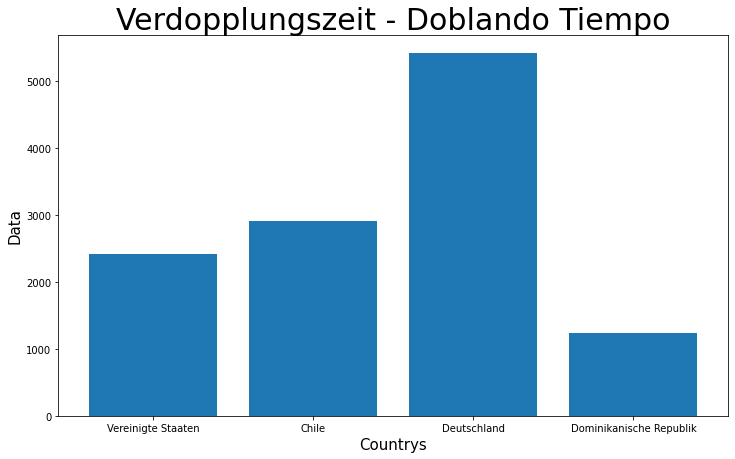

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7), sharey=True)
ax.bar(df_['Countrys'], df_['Verdopplungszeit'])
ax.set_xlabel("Countrys", fontdict={'fontsize': 15})
ax.set_ylabel("Data", fontdict={'fontsize': 15})
ax.set_title("Verdopplungszeit - Doblando Tiempo", fontdict={'fontsize': 30})
plt.savefig("Doblado Tiempo.jpg")
plt.show()




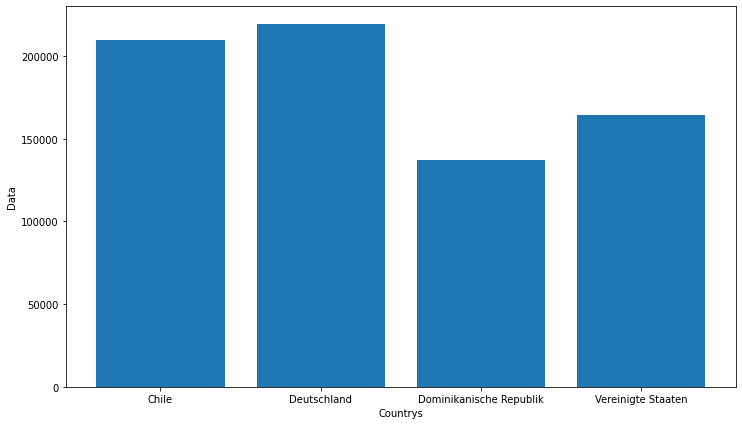

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7), sharey=True)
ax.bar(a.index, a['Verdopplungszeit'])
ax.set_xlabel("Countrys")
ax.set_ylabel("Data")
# ax.set_title("")
plt.show()

# Bestätigte Infektionen -  Infecciones Confirmadas

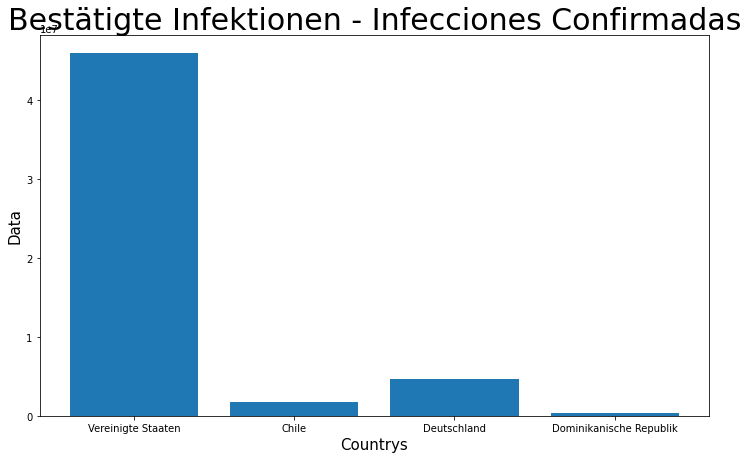

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7), sharey=True)
ax.bar(df_['Countrys'], df_['Bestätigte Infektionen'])
ax.set_xlabel("Countrys", fontdict={'fontsize': 15})
ax.set_ylabel("Data", fontdict={'fontsize': 15})
ax.set_title("Bestätigte Infektionen - Infecciones Confirmadas", fontdict={'fontsize': 30})
plt.savefig("Bestätigte Infektionen - Infecciones Confirmadas.jpg")
plt.show()
